# GRIP: The Sparks Foundation

## GRIPJANUARY23

### Task 02: Prediction using Decision Tree Algorithm

#### Author: _Chooladeva Piyasiri_
---

**Task:**

**Create the Decision Tree classifier and visualize it graphically.**

___

## Importing the dataset using pandas and also importing other libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the csv data

df_iris = pd.read_csv('Iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Basic Information regarding data

df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**df_iris contains total 6 features in which 4 independent features:**

- **SepalLengthCm**
- **SepalWidthCm**
- **PetalLengthCm**
- **PetalwidthCm** 

**and 1 dependent feature or target variable.**
- **Species**


In [4]:
# the basic numerical info about data for each numeric feature

df_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df_iris.shape

(150, 6)

In [6]:
#no. of data poins in each class labels

df_iris.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
# display the correlation matrix

df_iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


**A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables.**

## Data Preprocessing

In [8]:
#Droping Id column

df_iris.drop(['Id'],axis=1,inplace=True)
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Encoding

**Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form.**

In [9]:
from sklearn.preprocessing import LabelEncoder

# transform the string labels to integer 

le = LabelEncoder()
df_iris['Species'] = le.fit_transform(df_iris['Species'])
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
# separating independent varibles or target varibles

X = df_iris[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm']]
y = df_iris['Species']

## Splitting the dataset

**Here I am splitting 70% data for training and 30% for testing.**

In [11]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=0)

## Building the classification model

In [12]:
# Importing required libraries

from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [13]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [14]:
# model training
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
# testing the accuracies

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.98


- **So, the accuracy of Decision Tree classifier on training set is 1 (100%). Which means the model is overfitting.** 


- **To help avoiding overfitting, I am going to adjust the `max_depth` parameter as follows.**

In [16]:
model_2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(model_2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(model_2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.98


**Now the accuracy of Decision Tree classifier on training set is reduced to 0.98 by assigning the parameter `max_depth`= 3.**

## Visualizing decision trees

In [17]:
feature_cols =['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

r = tree.export_text(model, feature_names= feature_cols)
print(r)

|--- PetalWidthCm <= 0.75
|   |--- class: 0
|--- PetalWidthCm >  0.75
|   |--- PetalLengthCm <= 4.95
|   |   |--- PetalWidthCm <= 1.65
|   |   |   |--- class: 1
|   |   |--- PetalWidthCm >  1.65
|   |   |   |--- SepalWidthCm <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- SepalWidthCm >  3.10
|   |   |   |   |--- class: 1
|   |--- PetalLengthCm >  4.95
|   |   |--- PetalWidthCm <= 1.75
|   |   |   |--- PetalWidthCm <= 1.65
|   |   |   |   |--- class: 2
|   |   |   |--- PetalWidthCm >  1.65
|   |   |   |   |--- class: 1
|   |   |--- PetalWidthCm >  1.75
|   |   |   |--- class: 2



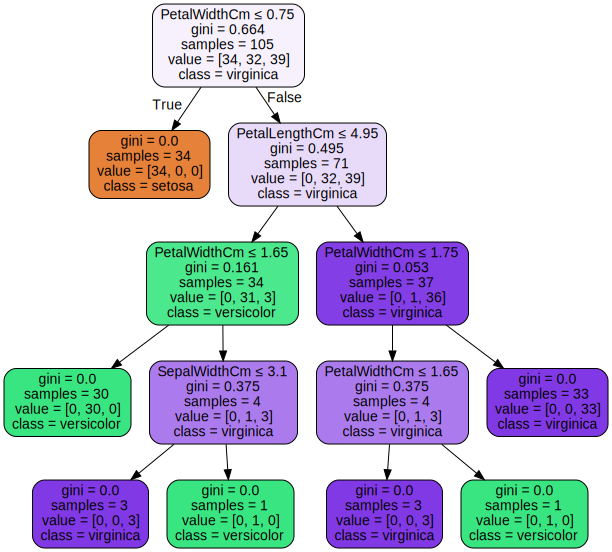

In [18]:
feature_cols = ['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
class_names = ['setosa', 'versicolor', 'virginica']

dot_data = tree.export_graphviz(model, out_file=None, 
                     feature_names=feature_cols,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph

## Pre-pruned version `(max_depth = 3)`

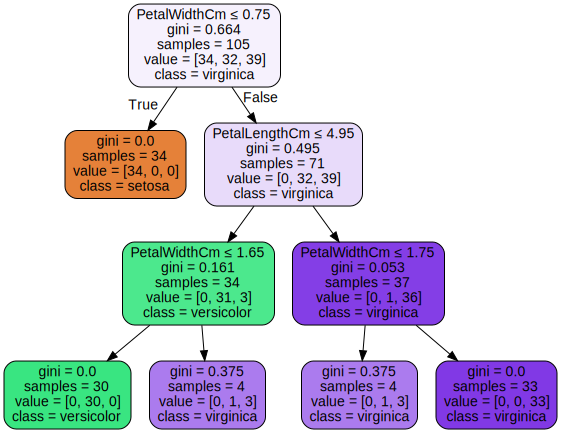

In [19]:
feature_cols = ['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
class_names = ['setosa', 'versicolor', 'virginica']

dot_data = tree.export_graphviz(model_2, out_file=None, 
                     feature_names=feature_cols,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

End of Task...